In [1]:
""" You must rename the folder containing the csv's to \'data\' """
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import math

In [2]:
wellness = pd.read_csv(filepath_or_buffer='./data/wellness.csv')
gps = pd.read_csv(filepath_or_buffer='./data/gps.csv')
games = pd.read_csv(filepath_or_buffer='./data/games.csv')
rpe = pd.read_csv(filepath_or_buffer='./data/rpe.csv')

In [3]:
wellness.Date = pd.to_datetime(wellness.Date, format="%Y-%m-%d")

In [4]:
date_wellness = wellness.set_index(['Date','PlayerID'])
date_wellness.head(5)

Fatigue  Soreness  Desire  Irritability   BedTime  \
Date       PlayerID                                                      
2018-07-21 1               3         3       2             3  23:00:00   
           2               4         3       4             4  23:00:00   
           3               3         3       5             4  22:30:00   
           4               2         3       5             4  00:30:00   
           5               5         3       4             4  23:45:00   

                     WakeTime  SleepHours  SleepQuality  MonitoringScore Pain  \
Date       PlayerID                                                             
2018-07-21 1         07:00:00        8.00             2               13   No   
           2         07:00:00        8.00             4               19  Yes   
           3         06:30:00        8.00             4               19   No   
           4         07:00:00        6.50             1               15   No   
           5         07:00:00        7.25             4               20   No   

                    Illness Menstruation  Nutrition NutritionAdjustment  \
Date       PlayerID                                                       
2018-07-21 1             No          Yes  Excellent                 Yes   
           2             No          Yes        NaN                 NaN   
           3             No           No        NaN                 NaN   
           4             No          Yes  Excellent                 Yes   
           5             No           No       Okay                 Yes   

                    USGMeasurement    USG TrainingReadiness  
Date       PlayerID                                          
2018-07-21 1                    No    NaN                0%  
           2                   Yes  1.010                0%  
           3                   Yes  1.016              100%  
           4                   Yes  1.025               95%  
           5                   Yes  1.022              100%

In [5]:
summation = 0
for item in gps.groupby('GameID').PlayerID.unique():
    summation += len(item)
    
print(summation)

448


In [6]:
max([len(groups) for groups in gps.groupby('GameID').groups.values()])

189107

In [70]:
def aveg(input_list, across=10):
    length = len(input_list)
    start = 0
    storage = np.zeros( math.ceil(length/across) )
    index = 0
    while (start + across -1) < length:
        storage[index] = np.max(input_list[start:(start+across)])
        start += across
        index += 1
    if (not storage[-1]) and (start < length):
        storage[-1] = np.max(input_list[start:])
    return storage

def run_tsne_mat(dim_red = 10):
    col_dim = max([ math.ceil( len(groups)/dim_red ) for groups in gps.groupby('GameID').groups.values()])
    tsne_mat = np.zeros((448,col_dim*6))
    
    i = 0
    j = 0
    
    game_id_label = np.zeros(448)
    player_id_label = np.zeros(448)
    
    for group in gps.groupby('GameID').groups.values():
        for player in gps.loc[group].groupby('PlayerID').groups.values():

            AccelX_raw = np.array(gps.loc[player].AccelX)
            AccelY_raw = np.array(gps.loc[player].AccelY)
            AccelZ_raw = np.array(gps.loc[player].AccelZ)
            AccelLoad_raw = np.array(gps.loc[player].AccelZ)
            Speed_raw = np.array(gps.loc[player].Speed)
            Impulse_raw = np.array(gps.loc[player].AccelImpulse)

            AccelX = aveg(AccelX_raw,dim_red)
            AccelY = aveg(AccelY_raw,dim_red)
            AccelZ = aveg(AccelZ_raw,dim_red)
            AccelLoad = aveg(AccelLoad_raw,dim_red)
            Speed = aveg(Speed_raw,dim_red)
            Impulse = aveg(Impulse_raw, dim_red)

            for x in AccelX:
                tsne_mat[i,j] 
                j+=1
            j = col_dim
            for y in AccelY:
                tsne_mat[i,j] = y
                j+=1
            j = col_dim*2
            for z in AccelZ:
                tsne_mat[i,j] = z
                j+=1
            j = col_dim*3
            for load in AccelLoad:
                tsne_mat[i,j] = load
                j+=1
            j = col_dim*4
            for speed in Speed:
                tsne_mat[i,j] = speed
                j+=1
            j = col_dim*5
            for impul in Impulse:
                tsne_mat[i,j] = impul
                j+=1
            
            player_id_label[i] = np.array(gps.loc[player].PlayerID)[0]
            game_id_label[i] = np.array(gps.loc[group].GameID)[0]
            i+=1
            j = 0
    return (tsne_mat, game_id_label, player_id_label)
    

In [83]:
tsne_mat, game_id, player_id = run_tsne_mat(5)
print(tsne_mat.shape)
print(any(game_id == 0))
print(any(player_id == 0))

(448, 226932)
False
False


Text(0,0.5,'cumulative explained variance')

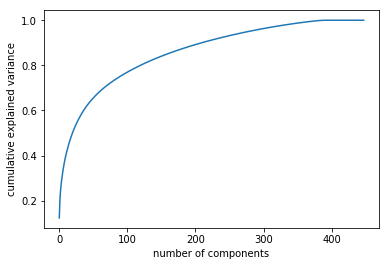

In [84]:
from sklearn.decomposition import PCA
pca = PCA().fit(tsne_mat)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [149]:
pca = PCA(n_components=19)
principalComponents = pca.fit_transform(tsne_mat)

[-19.46805893  -9.70914651  -1.06682679   1.87917146  12.47536957
  -8.74964703 -16.51273383  18.76555541  18.59505196  11.9140728
  23.4632266   11.39197089  -1.50657202   0.88549748 -10.00380846
  -0.42661082  24.40600139 -23.74834063  13.24585215]


In [86]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
embedding = TSNE(n_components=2,perplexity=70,n_iter=600,early_exaggeration=3).fit_transform(principalComponents)
print(embedding.shape)

(448, 2)


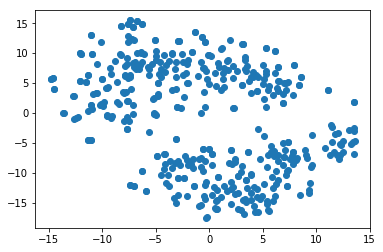

In [87]:
plt.scatter(embedding[:,0],embedding[:,1])

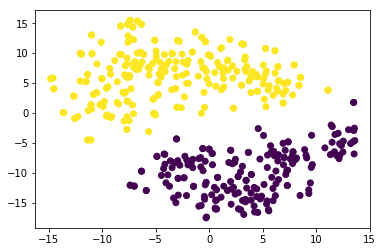

In [88]:
model = KMeans(n_clusters=2)
clu_emb = model.fit_predict(embedding)
plt.scatter(embedding[:,0],embedding[:,1],c=clu_emb)

In [14]:
pd.DataFrame(embedding).to_csv('tsne_3.csv')

In [89]:
with_label = pd.DataFrame(embedding)
with_label['label'] = clu_emb
with_label.to_csv('tsne_lab.csv')

In [90]:
df = pd.read_csv('tsne_lab.csv')
df['GameID'] = game_id
df['PlayerID'] = player_id
df.to_csv('tsne_lab_gp.csv')

In [133]:
# set the wellness dataset
date_wellness = wellness.set_index(['Date','PlayerID'])
date_wellness.head(5)

Fatigue  Soreness  Desire  Irritability   BedTime  \
Date       PlayerID                                                      
2018-07-21 1               3         3       2             3  23:00:00   
           2               4         3       4             4  23:00:00   
           3               3         3       5             4  22:30:00   
           4               2         3       5             4  00:30:00   
           5               5         3       4             4  23:45:00   

                     WakeTime  SleepHours  SleepQuality  MonitoringScore Pain  \
Date       PlayerID                                                             
2018-07-21 1         07:00:00        8.00             2               13   No   
           2         07:00:00        8.00             4               19  Yes   
           3         06:30:00        8.00             4               19   No   
           4         07:00:00        6.50             1               15   No   
           5         07:00:00        7.25             4               20   No   

                    Illness Menstruation  Nutrition NutritionAdjustment  \
Date       PlayerID                                                       
2018-07-21 1             No          Yes  Excellent                 Yes   
           2             No          Yes        NaN                 NaN   
           3             No           No        NaN                 NaN   
           4             No          Yes  Excellent                 Yes   
           5             No           No       Okay                 Yes   

                    USGMeasurement    USG TrainingReadiness  
Date       PlayerID                                          
2018-07-21 1                    No    NaN                0%  
           2                   Yes  1.010                0%  
           3                   Yes  1.016              100%  
           4                   Yes  1.025               95%  
           5                   Yes  1.022              100%

In [92]:
# set up the game dataset
game_id_Game = games.set_index(['GameID'])
game_id_Game.head(5)

,Date,Tournament,TournamentGame,Team,Opponent,Outcome,TeamPoints,TeamPointsAllowed
GameID,,,,,,,,
1,2017-11-30,Dubai,1,Canada,Spain,W,19,0
2,2017-11-30,Dubai,2,Canada,Ireland,W,31,0
3,2017-11-30,Dubai,3,Canada,Fiji,W,31,14
4,2017-12-01,Dubai,4,Canada,France,W,24,19
5,2017-12-01,Dubai,5,Canada,Australia,L,7,25


In [97]:
# read in the tsne labels
gp_tsne = pd.read_csv('tsne_lab_gp.csv')
gp_tsne.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1,inplace=True)
gp_tsne.head(5)

,0,1,label,GameID,PlayerID
0,2.434083,-13.524482,0,1.0,2.0
1,-4.730496,3.097500,1,1.0,3.0
2,2.218796,5.835577,1,1.0,4.0
3,5.972115,-12.583526,0,1.0,6.0
4,-4.804683,2.913355,1,1.0,7.0


In [102]:
# find the corresponding date we need to exam
correspond_date = np.array(game_id_Game.loc[gp_tsne.GameID].Date)
correspond_date = pd.to_datetime(correspond_date, format="%Y-%m-%d")

In [105]:
print(correspond_date[0:5])
print(len(correspond_date))

DatetimeIndex(['2017-11-30', '2017-11-30', '2017-11-30', '2017-11-30',
               '2017-11-30'],
              dtype='datetime64[ns]', freq=None)
448


In [106]:
# find the corresponding player we need to exam
correspond_player = np.array(gp_tsne.PlayerID)
print(len(correspond_player))

448


In [144]:
import datetime
after_day1 = []
after_day2 = []
after_day3 = []
after_day4 = []
after_day5 = []

date_boundary = datetime.datetime(2018,7,21)

index = 0
while index < 448:
    desire_date = correspond_date[index] + datetime.timedelta(days=1)
    if desire_date > date_boundary:
        desire_date = boundary
    desire_player = int(correspond_player[index])
    after_day1.append( ( desire_date, desire_player ) )
    index += 1
    
index = 0
while index < 448:
    desire_date = correspond_date[index] + datetime.timedelta(days=2)
    if desire_date > date_boundary:
        desire_date = boundary
    desire_player = int(correspond_player[index])
    after_day2.append( ( desire_date, desire_player ) )
    index += 1
    
index = 0 
while index < 448:
    desire_date = correspond_date[index] + datetime.timedelta(days=3)
    if desire_date > date_boundary:
        desire_date = boundary
    desire_player = int(correspond_player[index])
    after_day3.append( ( desire_date, desire_player ) )
    index += 1
    
index = 0
while index < 448:
    desire_date = correspond_date[index] + datetime.timedelta(days=4)
    if desire_date > date_boundary:
        desire_date = boundary
    desire_player = int(correspond_player[index])
    after_day4.append( ( desire_date, desire_player ) )
    index += 1
    
index = 0
while index < 448:
    desire_date = correspond_date[index] + datetime.timedelta(days=5)
    if desire_date > date_boundary:
        desire_date = boundary
    desire_player = int(correspond_player[index])
    after_day5.append( ( desire_date, desire_player ) )
    index += 1

In [146]:
import warnings
warnings.filterwarnings('ignore')
Fatigue1 = np.array(date_wellness.loc[after_day1].Fatigue)
Fatigue2 = np.array(date_wellness.loc[after_day2].Fatigue)
Fatigue3 = np.array(date_wellness.loc[after_day3].Fatigue)
Fatigue4 = np.array(date_wellness.loc[after_day4].Fatigue)
Fatigue5 = np.array(date_wellness.loc[after_day5].Fatigue)
print(len(Fatigue1),len(Fatigue2),len(Fatigue3),len(Fatigue4),len(Fatigue5))

448 448 448 448 448


In [147]:
gp_tsne_cp = gp_tsne.copy()
gp_tsne_cp['Fatigue1'] = Fatigue1
gp_tsne_cp['Fatigue2'] = Fatigue2
gp_tsne_cp['Fatigue3'] = Fatigue3
gp_tsne_cp['Fatigue4'] = Fatigue4
gp_tsne_cp['Fatigue5'] = Fatigue5

In [148]:
gp_tsne_cp.to_csv('with_fatigue.csv')

In [150]:
gp_tsne.groupby(player_id).label.value_counts()

      label
1.0   1        22
      0         6
2.0   0        30
      1         8
3.0   1        23
      0         3
4.0   1        26
      0        11
5.0   0        14
      1        14
6.0   0         5
7.0   1        31
      0         3
8.0   1        27
      0         7
9.0   0         5
      1         5
10.0  1        17
      0         9
11.0  1        31
      0         7
12.0  1        16
      0        12
13.0  0        27
      1        11
14.0  0        17
      1         1
15.0  1        12
      0         9
16.0  0        14
      1        14
17.0  0         5
      1         1
18.0  0         1
19.0  0         1
20.0  0         1
21.0  0         2
Name: label, dtype: int64